In [1]:
#Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data PreProcessing

In [4]:
data=pd.read_excel("loan.xlsx")

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Handling NA or missing data

In [7]:
data.fillna(0,inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder_1=LabelEncoder()
data["loan_status"]=label_encoder_1.fit_transform(data["loan_status"])

In [10]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data["term"]=data.term.str[:3]

In [12]:
data["term"]=data["term"].astype(int)

In [13]:
data["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [14]:
data.drop(["emp_title","sub_grade","issue_d","pymnt_plan","url","desc","title","zip_code","addr_state","earliest_cr_line",'initial_list_status',
          "last_pymnt_d","last_credit_pull_d","application_type",],axis=1,inplace=True)

In [15]:
label_encoder_2=LabelEncoder()
data["grade"]=label_encoder_1.fit_transform(data["grade"])
label_encoder_1=LabelEncoder()
data["home_ownership"]=label_encoder_1.fit_transform(data["home_ownership"])
label_encoder_1=LabelEncoder()
data["verification_status"]=label_encoder_1.fit_transform(data["verification_status"])
label_encoder_1=LabelEncoder()
data["purpose"]=label_encoder_1.fit_transform(data["purpose"])

In [16]:
data.drop("emp_length",axis=1,inplace=True)

In [17]:
#Correlation Matrix

In [18]:
data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.218589,0.078831,0.086587,-0.002615,-0.040846,...,NaN,NaN,NaN,NaN,-0.000569,NaN,NaN,NaN,NaN,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.234265,0.074725,0.081025,-0.001697,-0.044114,...,NaN,NaN,NaN,NaN,0.000809,NaN,NaN,NaN,NaN,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.361036,0.309415,0.930288,0.290447,-0.175968,...,NaN,NaN,NaN,NaN,-0.036284,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.340510,0.312619,0.956159,0.291034,-0.170489,...,NaN,NaN,NaN,NaN,-0.037636,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.360747,0.306657,0.905039,0.268682,-0.167500,...,NaN,NaN,NaN,NaN,-0.037982,NaN,NaN,NaN,NaN,NaN
term,0.218589,0.234265,0.361036,0.340510,0.360747,1.000000,0.451699,0.101973,0.430900,-0.106522,...,NaN,NaN,NaN,NaN,0.014207,NaN,NaN,NaN,NaN,NaN
int_rate,0.078831,0.074725,0.309415,0.312619,0.306657,0.451699,1.000000,0.282703,0.948627,0.064337,...,NaN,NaN,NaN,NaN,0.083579,NaN,NaN,NaN,NaN,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,0.101973,0.282703,1.000000,0.267104,-0.138246,...,NaN,NaN,NaN,NaN,-0.033746,NaN,NaN,NaN,NaN,NaN
grade,-0.002615,-0.001697,0.290447,0.291034,0.268682,0.430900,0.948627,0.267104,1.000000,0.054169,...,NaN,NaN,NaN,NaN,0.077713,NaN,NaN,NaN,NaN,NaN
home_ownership,-0.040846,-0.044114,-0.175968,-0.170489,-0.167500,-0.106522,0.064337,-0.138246,0.054169,1.000000,...,NaN,NaN,NaN,NaN,-0.031056,NaN,NaN,NaN,NaN,NaN


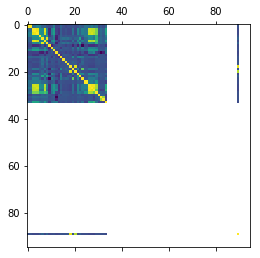

In [19]:
plt.matshow(data.corr())
plt.show()

In [20]:
#Dividing Data base on depending variable
#Depending Variable loan_status

In [21]:
train=data.drop("loan_status",axis=1)
test=data["loan_status"]

In [22]:
train.drop("next_pymnt_d",axis=1,inplace=True)

In [23]:
#Correlation Bar plot

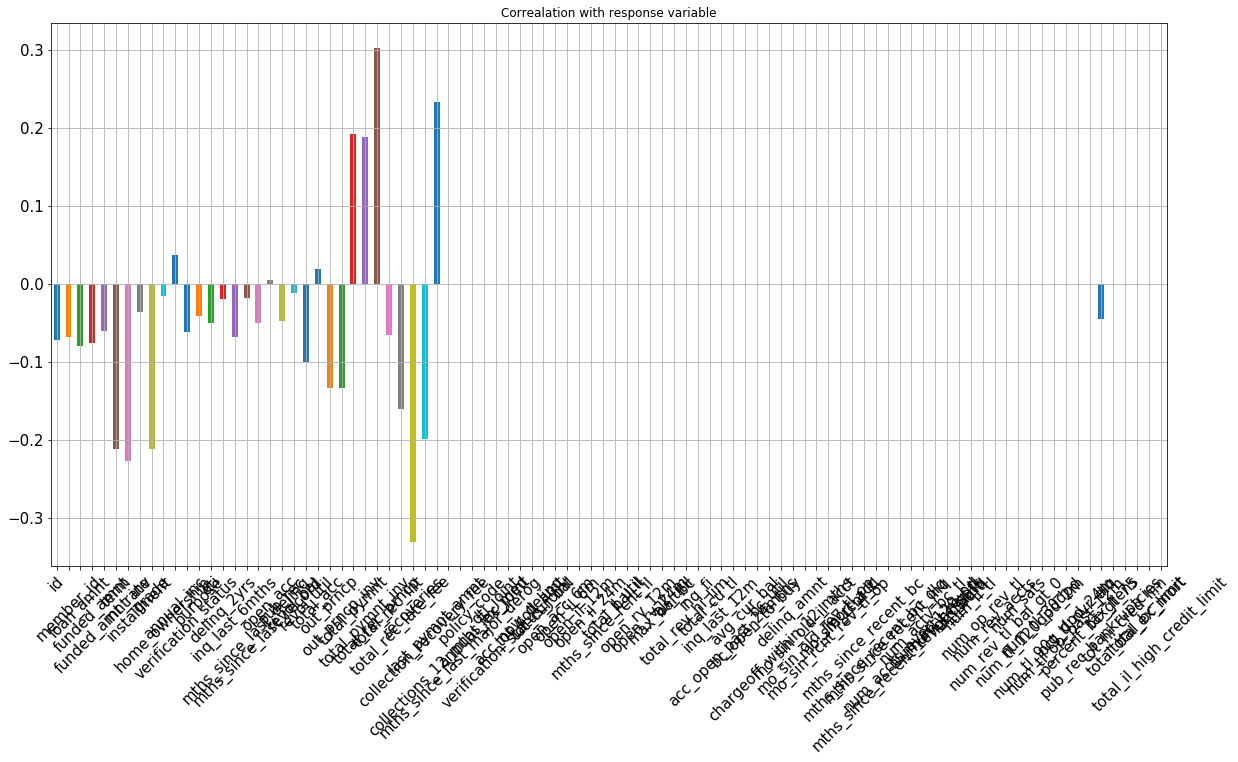

In [24]:
train.corrwith(test).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

In [25]:
train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', '

In [26]:
#Removing Useless Data

In [27]:
train1=train.iloc[:,:36]

In [28]:
train2=train.iloc[:,61]

In [29]:
train3=train.iloc[:,88]

In [30]:
train1["charged_within_12_mths"]=train2
train1["pub_rec_bankruptcies"]=train3

In [31]:
train=train1

In [32]:
train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'charged_within_12_mths', 'pub_rec_bankruptcies'],
      dtype='object')

In [33]:
train.drop(['last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'charged_within_12_mths',],axis=1,inplace=True)

In [34]:
#Correlation barplot after removing useless data

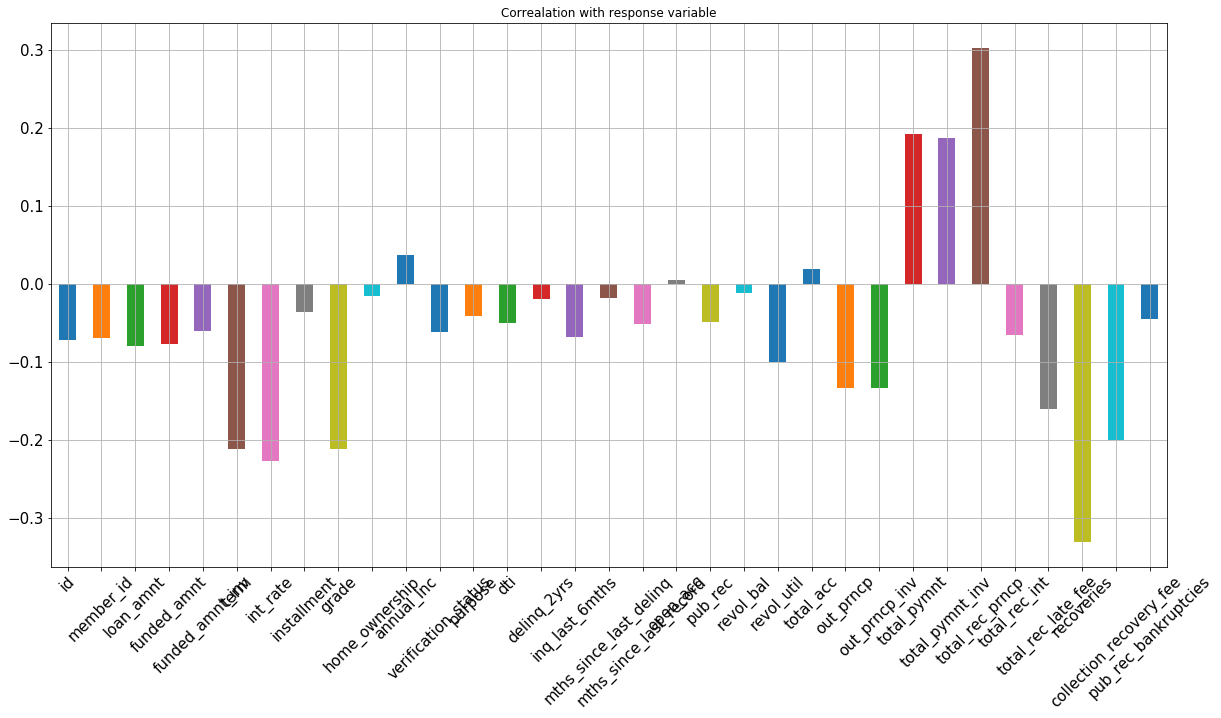

In [35]:
train.corrwith(test).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

In [36]:
#Feautre Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
train=sc.fit_transform(train)

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
#Library for Training Model

In [40]:
from sklearn import model_selection

In [41]:
#Train Test Split

In [42]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(train,test)

In [43]:
#Importing Of Machine Learning Model

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#Random Forest

In [46]:
alg1=RandomForestRegressor(n_estimators=50,random_state=0,criterion="mse")
alg1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
#Decesion Tree

In [48]:
alg2=DecisionTreeClassifier()
alg2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
#Logistic Regression

In [50]:
alg3=LogisticRegression()
alg3.fit(x_train,y_train)

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
#Naive Bayes

In [52]:
alg4=GaussianNB()
alg4.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
#K-Means

In [54]:
alg5=KNeighborsClassifier()
alg5.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
#Fucntion to calculate accuracy

In [56]:
def sc(y_truth,y_pred1):
    u=((y_truth-y_pred1)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-(u/v)

In [57]:
#Prediction

In [58]:
y_pred_1=alg1.predict(x_test)
y_pred_2=alg2.predict(x_test)
y_pred_3=alg3.predict(x_test)
y_pred_4=alg4.predict(x_test)
y_pred_5=alg5.predict(x_test)

In [59]:
#Printing the accuracis of all models

In [60]:
print("Random Forest accuracy:",sc(y_test,y_pred_1))
print("Decesion Tree accuracy:",sc(y_test,y_pred_2))
print("Logistic Regression accuracy:",sc(y_test,y_pred_3))
print("Naive Bayes accuracy:",sc(y_test,y_pred_4))
print("Kmean accuracy:",sc(y_test,y_pred_5))

Random Forest accuracy: 0.9803826721195208
Decesion Tree accuracy: 0.9688221841388625
Logistic Regression accuracy: 0.9390801887450142
Naive Bayes accuracy: 0.6336606636316342
Kmean accuracy: 0.27655160169584203


In [61]:
dfs=pd.DataFrame(columns=("Algorithm","Accuracy"))

In [62]:
dfs.loc[1]=["Random Forest",sc(y_test,y_pred_1)]
dfs.loc[2]=["Decision Tree",sc(y_test,y_pred_2)]
dfs.loc[3]=["Logistic Regression",sc(y_test,y_pred_3)]
dfs.loc[4]=["Naive Bayes",sc(y_test,y_pred_4)]
dfs.loc[5]=["K-Means",sc(y_test,y_pred_5)]

In [63]:
dfs

,Algorithm,Accuracy
1,Random Forest,0.980383
2,Decision Tree,0.968822
3,Logistic Regression,0.939080
4,Naive Bayes,0.633661
5,K-Means,0.276552


In [64]:
#Bar Plot to determine best algorithm with best accuracy

Text(0, 0.5, 'Accuracies')

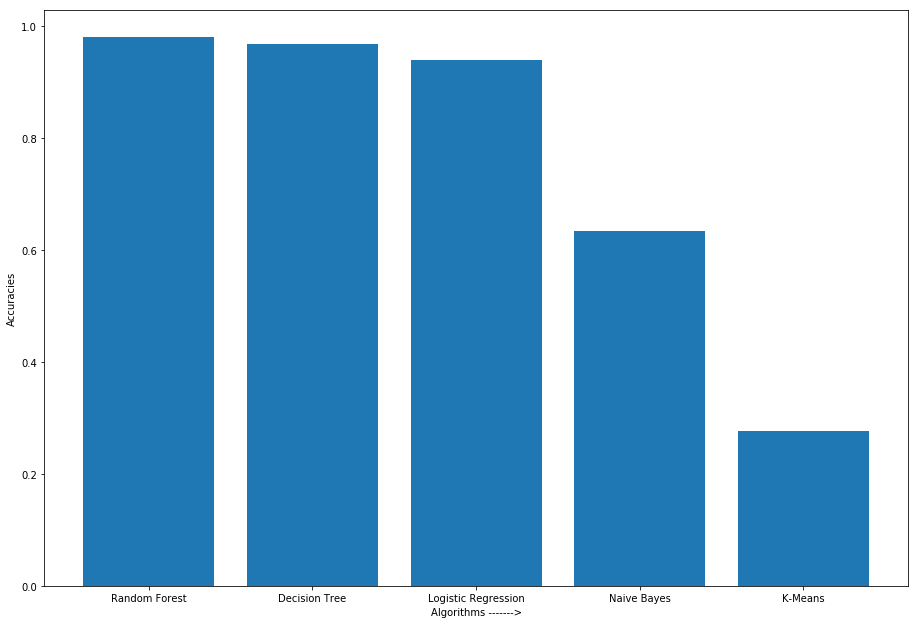

In [65]:
fig=plt.figure()
axes=fig.add_axes([2,2,2,2])
axes.bar(dfs["Algorithm"],dfs["Accuracy"])
axes.set_xlabel("Algorithms ------->")
axes.set_ylabel("Accuracies")

In [66]:
#So the Random Forest Classifier is best among them with accuracy of 98% and hence we wil choose the prediction of random forest classifier

In [67]:
y_pred=pd.DataFrame(y_pred_1)
y_pred.to_csv("Loan_Chargeoff.csv")

In [68]:
x_test=pd.DataFrame(x_test)

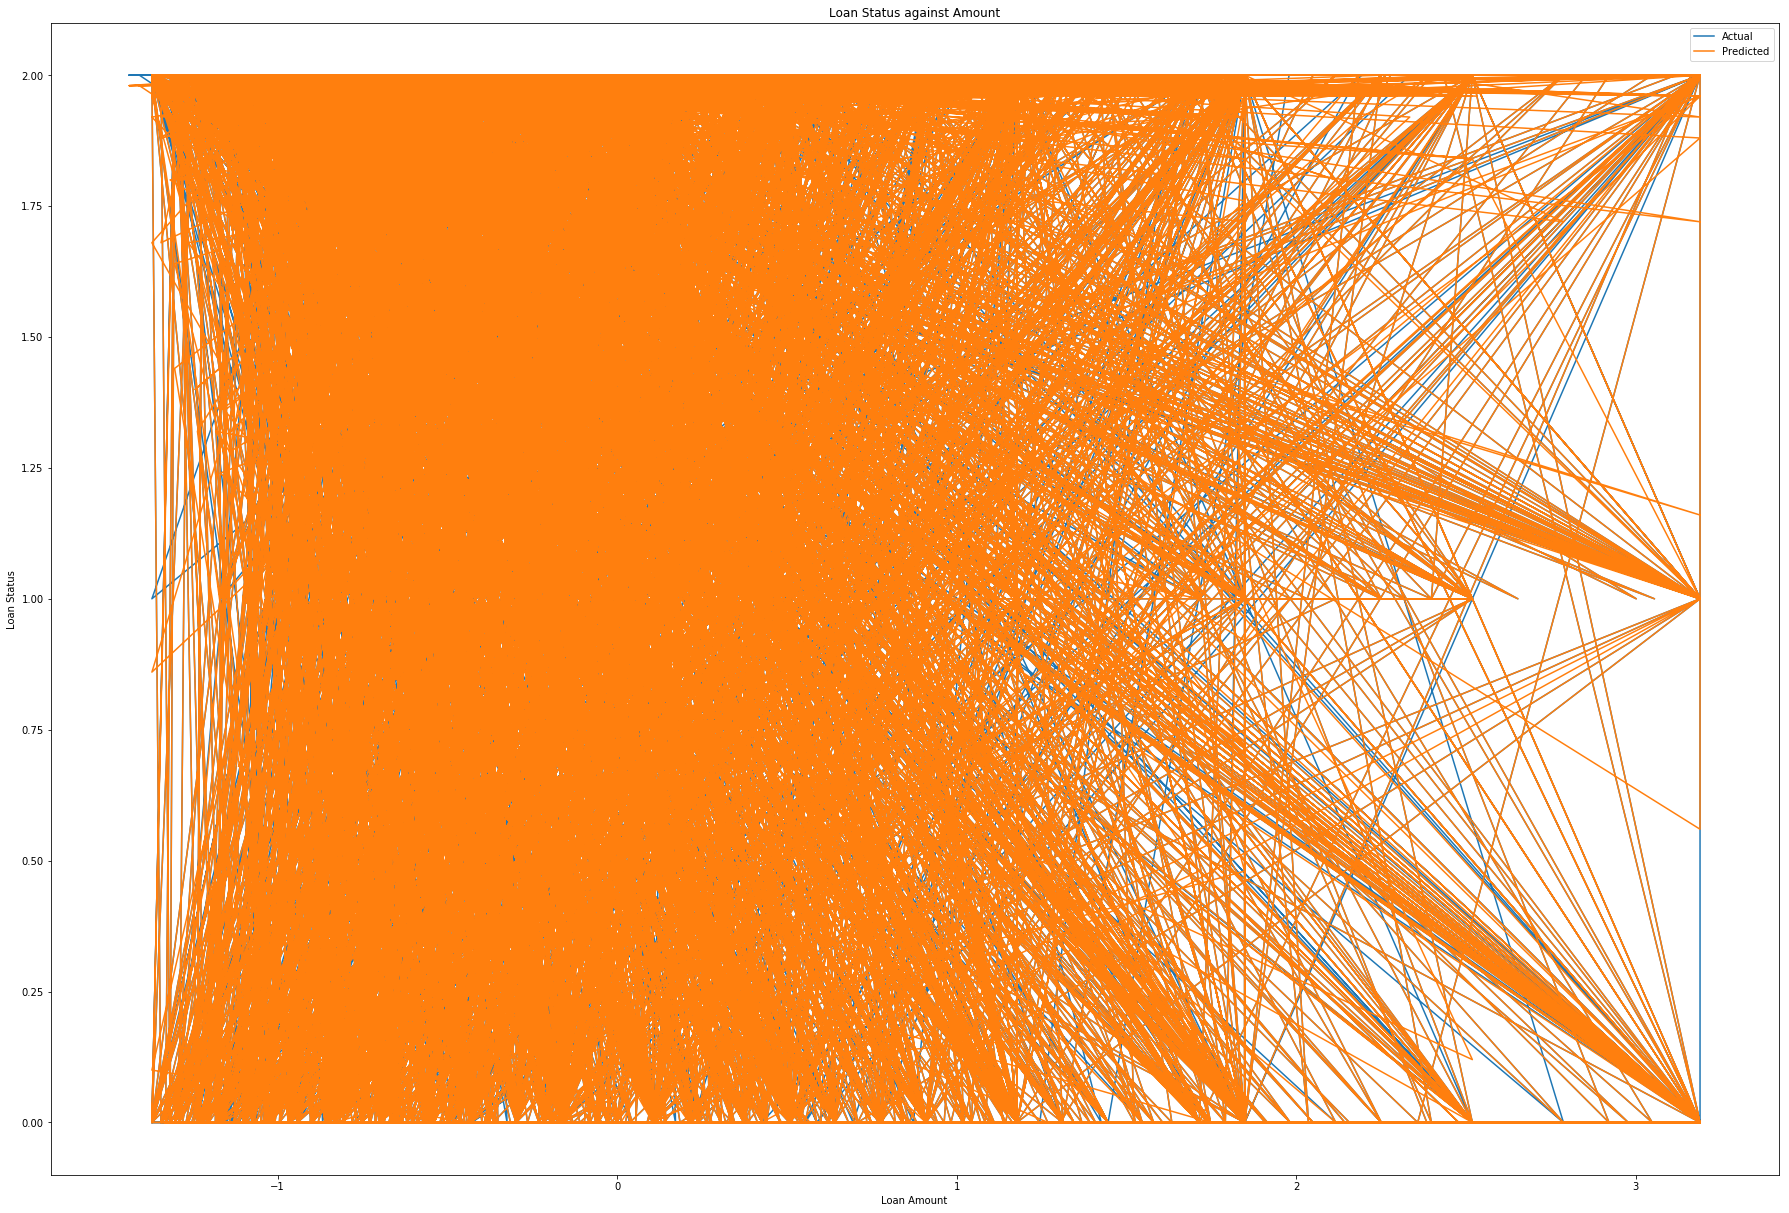

In [69]:
#Plotting of Predicted Data against Actual Data
fig=plt.figure()
ax=fig.add_axes([4,4,4,4])
y=y_test
x=x_test[2]
y1=y_pred_1
ax.plot(x,y,label="Actual")
ax.plot(x,y1,label="Predicted")
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Loan Status")
ax.set_title("Loan Status against Amount")
ax.legend()

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


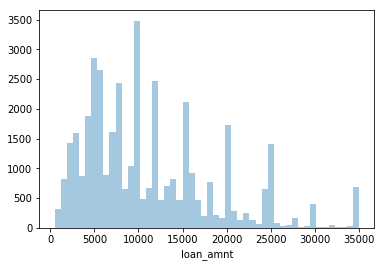

In [70]:
sns.distplot(data["loan_amnt"],kde=False)


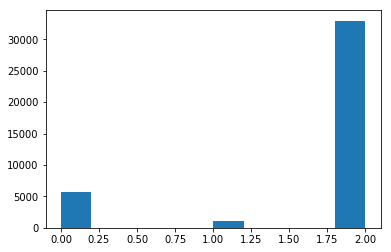

In [71]:
plt.hist(data["loan_status"])
plt.show()
#According to plot 
# 0 = Charged Off
# 1= Current
# 2= Fully Paid

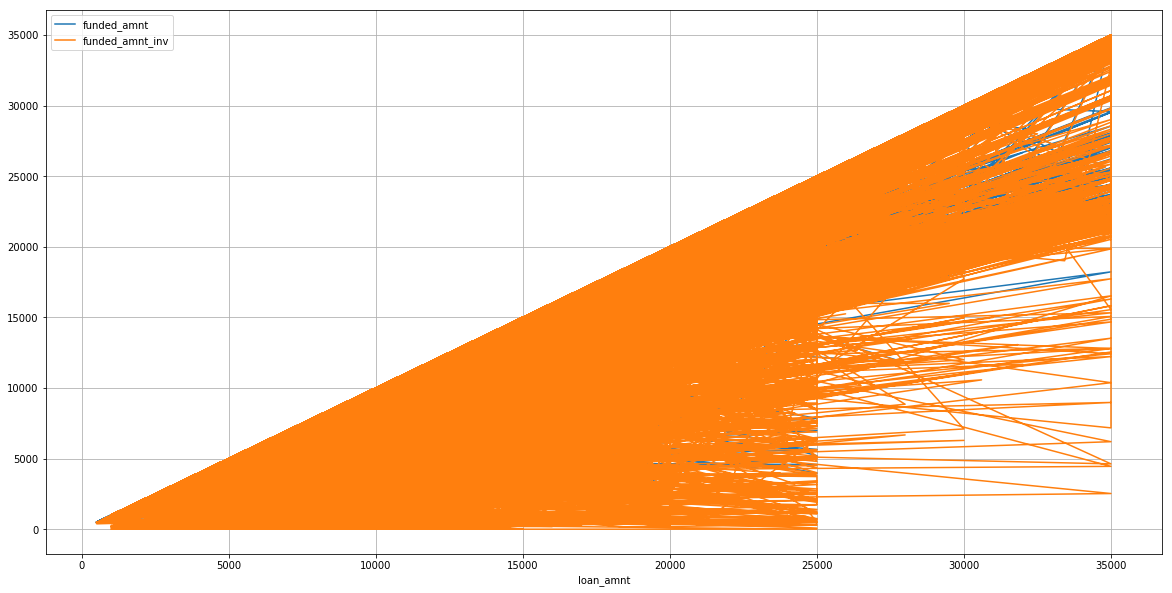

In [72]:
data.plot(x='loan_amnt', y=['funded_amnt', 'funded_amnt_inv'], figsize=(20,10), grid=True)
#It shows difference between funded amount and invested amount
#According to plot values of both columns are almost similar

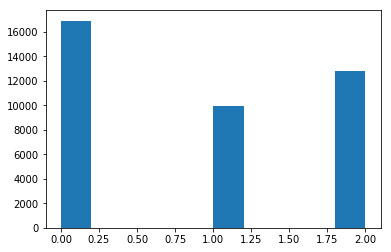

In [74]:
plt.hist(data["verification_status"])
plt.show()
#According to plot 
# 0 = Not Verified
# 1= Source Verified
# 2= Verified
# This shows case of non-verification are more 

In [92]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36,0.1065,162.87,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60,0.1527,59.83,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36,0.1596,84.33,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36,0.1349,339.31,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60,0.1269,67.79,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36,0.0790,156.46,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60,0.1596,170.08,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36,0.1864,109.43,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60,0.2128,152.39,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60,0.1269,121.45,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Conclusion:
'''
1.After looking the data lots of data cleaning was need as there was lots of useless data which can affect our model
2.NA or missing data were handled
3.Encoding of characted data to integer using label encoder which convert the categorical data into integer
4.Here depending variable was loan_status
5.Correlation matrix and charts were created to know which columns are more usefull and corealted to depending variable
6.After analysing the correlation matrix and barplot lots of columns removed to avoid overfitting
7.Feature Scaling were applied to get more accurate data
8.After that various machine learning model were trained using training data
9.On comparing accuracy of all model random forest was turned to be best with 98% accuracy
10.So random forest classifier can be suitable to identitfy the future defaulters
11.Visualization was performed to know about the trend
'''